In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Low-level interface with `matplotlib`
A potentially confusing feature of Matplotlib is its dual interfaces: a convenient MATLAB-style state-based interface of `pyplot`, and a more powerful object-oriented interface. 

Matplotlib was originally written as a Python alternative for MATLAB users, and much of its syntax reflects that fact. The MATLAB-style tools are contained in the `pyplot` (`plt`) interface. For example, the following code will probably look quite familiar to MATLAB users:

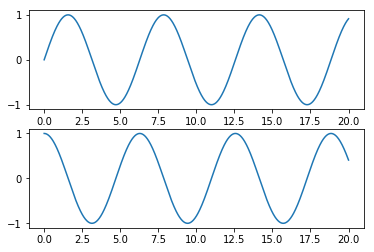

In [2]:
x = np.linspace(0,20,1000)

plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

This interface is fast and convenient for simple plots, it keeps track of the "current" figure and axes, which are where all `plt` commands are applied. But it is easy to run into problems. For example, once the second panel is created, how can we go back and add something to the first? This is possible within the MATLAB-style interface, but a bit clunky. Fortunately, there is a better way.

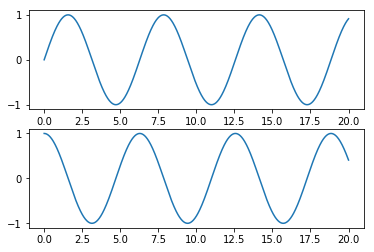

In [53]:
# create figure
fig = plt.figure()

# add axes to the figure
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

# call plot() method on the axes
ax1.plot(x, np.sin(x))
ax2.plot(x, np.cos(x));

Here we need to look a bit closer to what is going on and what structure does the `matplotlib` figure have. A figure is is a visual container, and it can be created with `plt.figure()` command. It has several parameters, the most used of which is `figsize`, where we can specify the size of the figure:

In [318]:
# create a square figure
fig = plt.figure(figsize=(5,5))
fig

As you can see, by itself, `figure` doesn't show anything, it is an empty container. We need to populate it with `axes`. Main way to do it is to use method `add_subplot`. Think about this method as if it divides the figure in a grid and adds `axes` in one of the cells of that grid. The arguments this method requires are (1) number of rows of the grid, (2) number of columns of the grid, and (3) in which cell (counting left to right, top to bottom) create an axis. In the example above, we call `add_subplot` twice, each time we ask it to divide the figure in 2 rows and 1 column, and take the each of the axes in turn to plot sine and cosine. If you want just one set of axes on your figure, you can call `add_subplot(1,1,1)`. But here we will create multiple sets of axes. Start with one:

In [319]:
ax1 = fig.add_subplot(2,1,1)

Now let's examine our figure again:

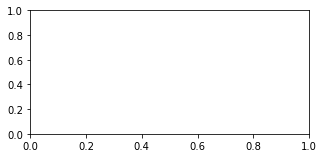

In [320]:
fig

We see that now we have the axes. Axes are what holds the plots. Anything that draws on the axes is called an *Artist*. Very poetic.

>**Note** that although the figure we created is a square (5 by 5 units) what we see now is only one set of axes, and they occupy only the top half of our figure, because that's how we defined it.

Now let's add another set of axes. And just for the sake of it, instead of doing the second half as one plot, I will split it in two. For that I will need to change the grid in `add_subplot` to a 2 by 2, instead of 2 by 1:

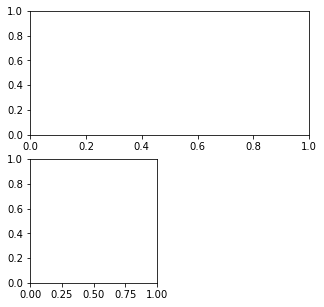

In [321]:
# first and second cell on that grid are on the top half
# so I take the third cell
ax2 = fig.add_subplot(2,2,3)
fig

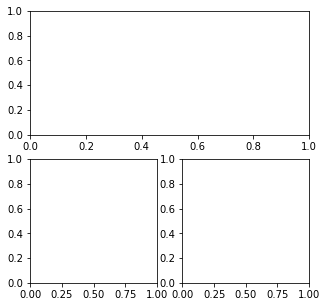

In [322]:
# and the forth cell
ax3 = fig.add_subplot(2,2,4)
fig

Let's remind ourselves that this is a hierarchical structure. Figure contains axes, which in turn contain Artists. We can use method `get_children()` on both figure and axes to see what they contain. E.g.:

In [323]:
fig.get_children()

Figure contains 4 objects. A rectangle (which is the background of the figure) and 3 sets of axes, which we just created.

Let's examine children of one of the axes:

In [324]:
ax1.get_children()

Axes already contain a lot of things things from the start, which is can be evident from just looking at them. They contain spines, and ticks, and background rectangle and so on. Although we usually don't do it, we can change things directly on on these objects. For example, I can take the first element from that list above and change something, for example color. Almost all objects in `matplotlib` have method `set_color()` specifically for that purpose:

In [325]:
ax1.get_children()[0].set_color('red')

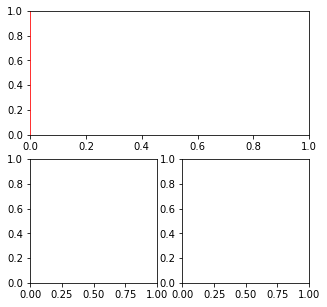

In [326]:
# now let's re-examine our figure
fig

We see that one of the sides of the box became red. This shows you that potentially you have control over any detail of your figures, plots and axes, at a very low level. Everything is very transparent here.

However, it would be very cumbersome to change all of these things manually every time we need. It would require a lot of code and settings to get everything just the way you want it. To simplify interaction with the plots, `matplotlib` has higher-level methods.

Let's start with methods that plot something on the axes and then go to the settings. These are already familiar to us from the `pyplot` API, e.g. `plot`, `scatter`, `violinplot`, `boxplot`, `hist`, etc. But now instead of calling them as functions, we call them as methods on the axes where we want to create them! Very straightforward:

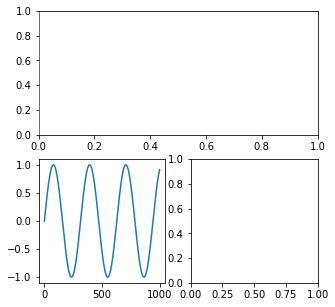

In [327]:
ax2.plot(np.sin(x))
fig

Then we can easily go back and plot something on another set of axes:

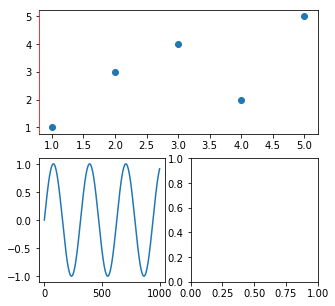

In [328]:
ax1.scatter([1,4,2,3,5],[1,2,3,4,5])
fig

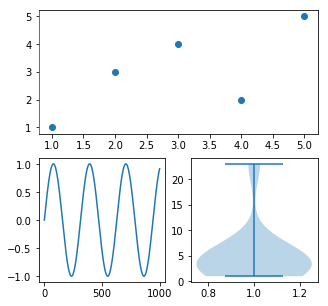

In [329]:
ax3.violinplot([1,2,3,4,5,23,4,3,1,5,7,3])
fig

With regards to the settings of the axes, the full list of methods can be found on `matplotlib` [Axes documentation](https://matplotlib.org/api/axes_api.html) (not that each method has many settings, which are not listed on that page, but rather in the details of the method). 

But since the library is extensively used, specific things can be easily found by searching "matplotlib `<`what you want to do`>`", usually with comprehensive explanations on Stackoverflow. Let's see some examples:

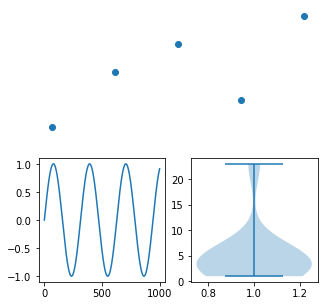

In [330]:
# remove X and Y axes
ax1.set_axis_off()
fig

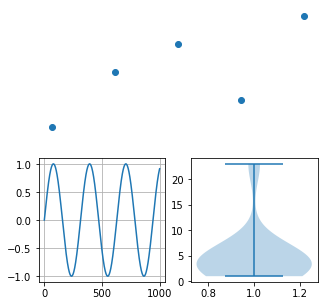

In [331]:
# turn grid on
ax2.grid('on')
fig

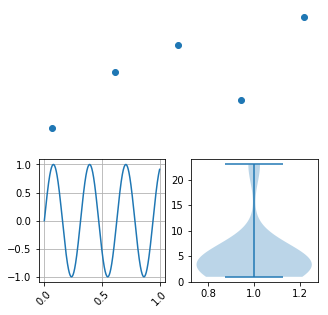

In [332]:
# get ticks on the X axis and then set the ticks 1/1000 
# of the original values and rotate them to 45 degrees
t = ax2.get_xticks()
ax2.set_xticklabels(t/1000, rotation=45)
fig

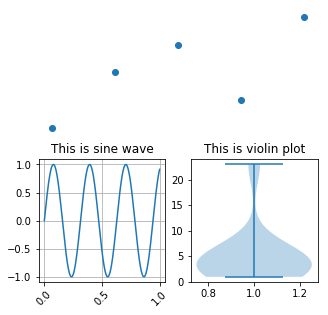

In [333]:
# set the title of the subplots
ax2.set_title('This is sine wave')
ax3.set_title('This is violin plot')
fig

As you can see, the possibilities are limitless with `matplotlib`, and hopefully the structure seems transparent to you too.

Let's see another example with real data. We will plot the scatter of the Iris dataset, and the histogram for each of the species separately.

In [334]:
iris = pd.read_csv('data/iris.csv')
iris.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


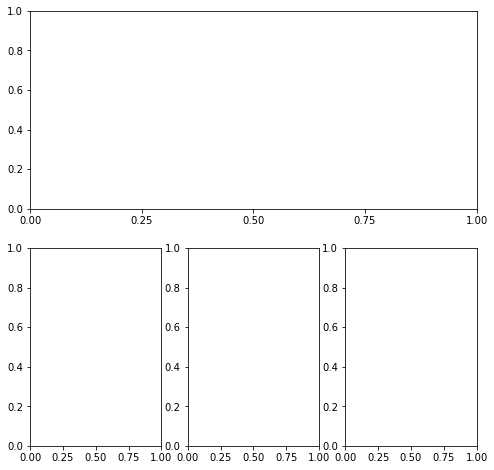

In [335]:
fig = plt.figure(figsize=(8,8))
scat = fig.add_subplot(2,1,1)
# sharex will bind the X axis of the histograms to the x axis 
# of the scatterplot, so that their limits will be always the same
hist = [fig.add_subplot(2,3,4, sharex=scat),
        fig.add_subplot(2,3,5, sharex=scat),
        fig.add_subplot(2,3,6, sharex=scat)]

In [271]:
species_colors = {'setosa':     plt.cm.Set1.colors[0],
                  'versicolor': plt.cm.Set1.colors[1],
                  'virginica':  plt.cm.Set1.colors[2]}

for i, (sp, data) in enumerate(iris.groupby('species')):
    scat.plot(data['sepal length'],data['sepal width'],'o',
              color=species_colors[sp])
    hist[i].hist(data['sepal length'], 
                 color=species_colors[sp])

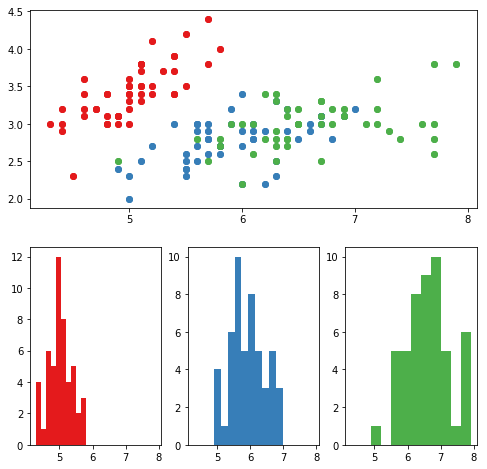

In [272]:
fig

# <font color='DarkSeaGreen'>Exercise</font>
Using brain sized dataset (`data/brain_size.csv`), create a compound figure with 3 axes in 1 row, on each of them create a scatterplot of one of the IQ scores (Y axis) based on MRI_Count (X axis). If you feel like being challenged, color the points according to the gender.

Further adjustements:
- set the title of each subplot to be the IQ score type on that plot
- set the X axis label on each plot to 'MRI_count'
- show the legend which would say the gender is displayed in which color; show the legend outside the figure on the right (you'd have to search how to do that)
- plot the mean score for each group as a horisontal dashed line

In [336]:
brains = pd.read_csv('data/brain_size.csv')
brains.replace({'.':np.nan}, inplace=True)

brains.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133,132,124,118,64.5,816932
1,Male,140,150,124,NaN,72.5,1001121
2,Male,139,123,150,143,73.3,1038437
3,Male,133,129,128,172,68.8,965353
4,Female,137,132,134,147,65.0,951545


> [Brain sizes dataset [1]](http://wps.aw.com/wps/media/objects/14/15269/projects/ch6_iq/brain.html): 

> *Gender*: Male or Female

> *FSIQ*: Full Scale IQ scores based on the four Wechsler (1981) subtests

> *VIQ*: Verbal IQ scores based on the four Wechsler (1981) subtests

> *PIQ*: Performance IQ scores based on the four Wechsler (1981) subtests

> *Weight*: body weight in pounds

> *Height*: height in inches

> *MRICount*: total pixel Count from the 18 MRI scans

> [1] Willerman, L., Schultz, R., Rutledge, J. N., and Bigler, E. (1991), "In Vivo Brain Size and Intelligence," Intelligence, 15, 223-228

[Solution](https://anotepad.com/notes/qgk6j6)